# Name - Vasu Bansal
# Roll No. - 045055

# Project - Terrorism Activity Analysis

**Synopsis**

The dataset covers a wide range of data on terrorism including the province, city, state, country, dates of attacks, number of wounded and killed, and the exact co-ordinates of the attack. Dataset has 181691 entries from around the world and provides us with a comprehensive overview of the inconvenieces caused by terrorism and the problems that might arise for organisations.
There are a total of 12 unique regions, 205 unique countries, 2855 unique provinces/states, 9 unique attack types, and a substantial number of unique cities (36674). This highlights the global nature of the dataset and the wide range of locations and contexts in which terrorist attacks have occurred.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('modified_globalterrorismdb_0718dist.csv')
df.head(10)

,region_txt,country_txt,provstate,city,iyear,latitude,longitude,nkill,nwound,attacktype1
0,Central America & Caribbean,Dominican Republic,NaN,Santo Domingo,1970,18.456792,-69.951164,1.0,0.0,1
1,North America,Mexico,Federal,Mexico city,1970,19.371887,-99.086624,0.0,0.0,6
2,Southeast Asia,Philippines,Tarlac,Unknown,1970,15.478598,120.599741,1.0,0.0,1
3,Western Europe,Greece,Attica,Athens,1970,37.997490,23.762728,NaN,NaN,3
4,East Asia,Japan,Fukouka,Fukouka,1970,33.580412,130.396361,NaN,NaN,7
5,North America,United States,Illinois,Cairo,1970,37.005105,-89.176269,0.0,0.0,2
6,South America,Uruguay,Montevideo,Montevideo,1970,-34.891151,-56.187214,0.0,0.0,1
7,North America,United States,California,Oakland,1970,37.791927,-122.225906,0.0,0.0,3
8,North America,United States,Wisconsin,Madison,1970,43.076592,-89.412488,0.0,0.0,7
9,North America,United States,Wisconsin,Madison,1970,43.072950,-89.386694,0.0,0.0,7


In [2]:
df.shape

(181691, 10)

In [3]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   region_txt   181691 non-null  object 
 1   country_txt  181691 non-null  object 
 2   provstate    181270 non-null  object 
 3   city         181257 non-null  object 
 4   iyear        181691 non-null  int64  
 5   latitude     177135 non-null  float64
 6   longitude    177134 non-null  float64
 7   nkill        171378 non-null  float64
 8   nwound       165380 non-null  float64
 9   attacktype1  181691 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 13.9+ MB
None


In [4]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
               iyear       latitude     longitude          nkill  \
count  181691.000000  177135.000000  1.771340e+05  171378.000000   
mean     2002.638997      23.498343 -4.586957e+02       2.403272   
std        13.259430      18.569242  2.047790e+05      11.545741   
min      1970.000000     -53.154613 -8.618590e+07       0.000000   
25%      1991.000000      11.510046  4.545640e+00       0.000000   
50%      2009.000000      31.467463  4.324651e+01       0.000000   
75%      2014.000000      34.685087  6.871033e+01       2.000000   
max      2017.000000      74.633553  1.793667e+02    1570.000000   

              nwound    attacktype1  
count  165380.000000  181691.000000  
mean        3.167668       3.247547  
std        35.949392       1.915772  
min         0.000000       1.000000  
25%         0.000000       2.000000  
50%         0.000000       3.000000  
75%         2.000000       3.000000  
max      8191.000000       9.000000  



Correlation Matrix:
                iyear  latitude  longitude     nkill    nwound  attacktype1
iyear        1.000000  0.166933   0.003917  0.015341  0.015273     0.074153
latitude     0.166933  1.000000   0.001463 -0.018124  0.015988     0.010135
longitude    0.003917  0.001463   1.000000 -0.000562  0.000223     0.001554
nkill        0.015341 -0.018124  -0.000562  1.000000  0.534375     0.002475
nwound       0.015273  0.015988   0.000223  0.534375  1.000000     0.000846
attacktype1  0.074153  0.010135   0.001554  0.002475  0.000846     1.000000


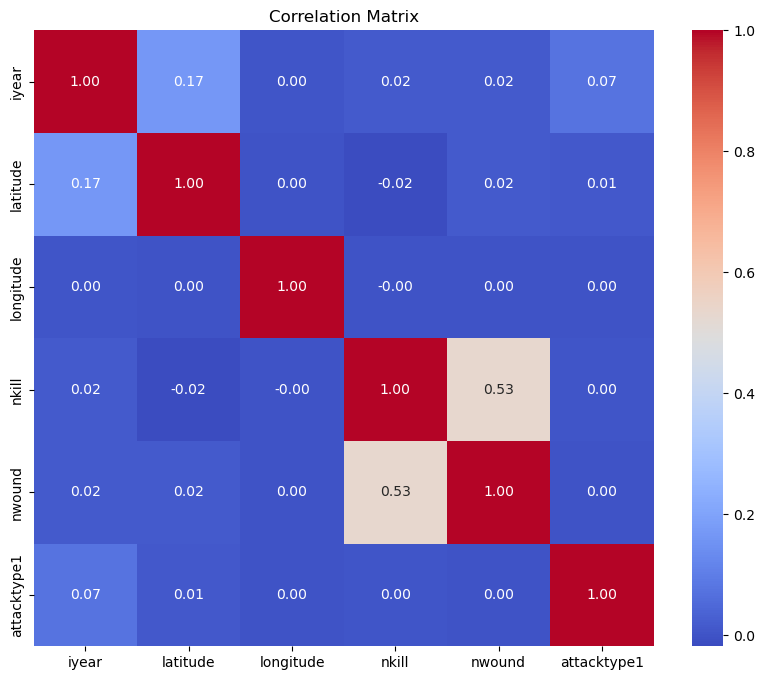

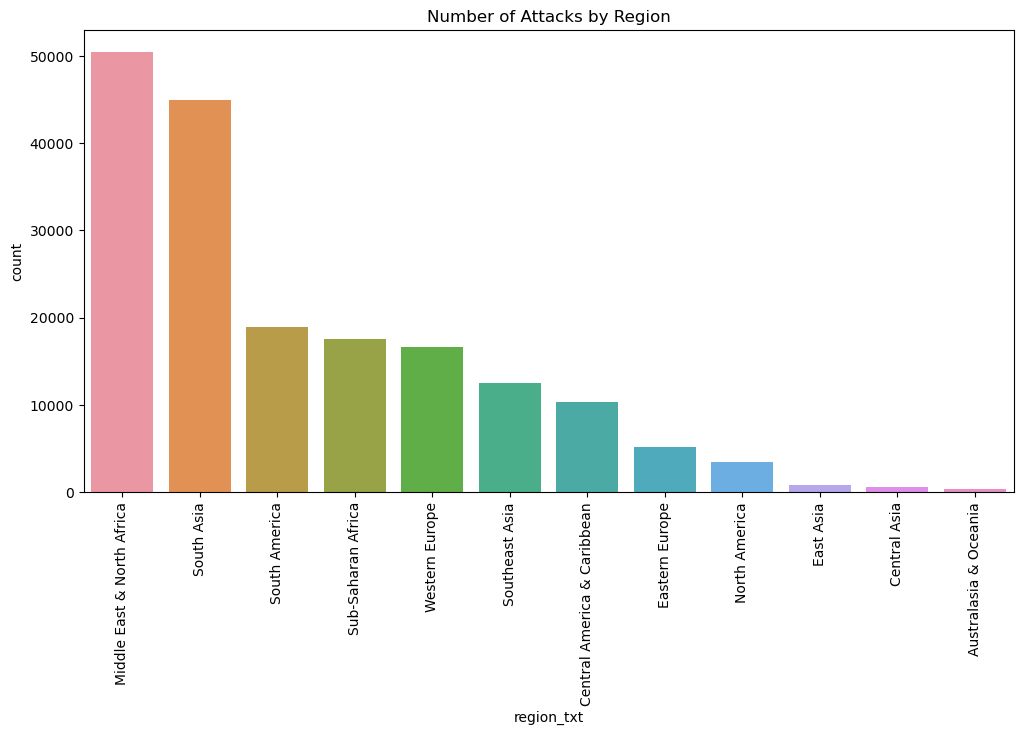

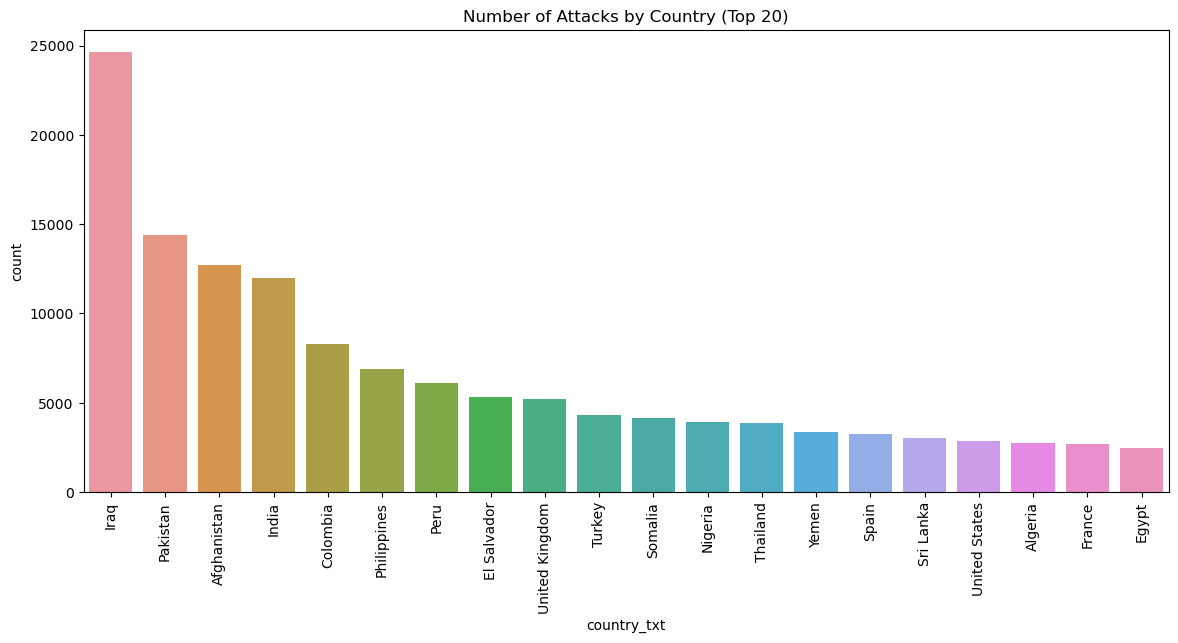

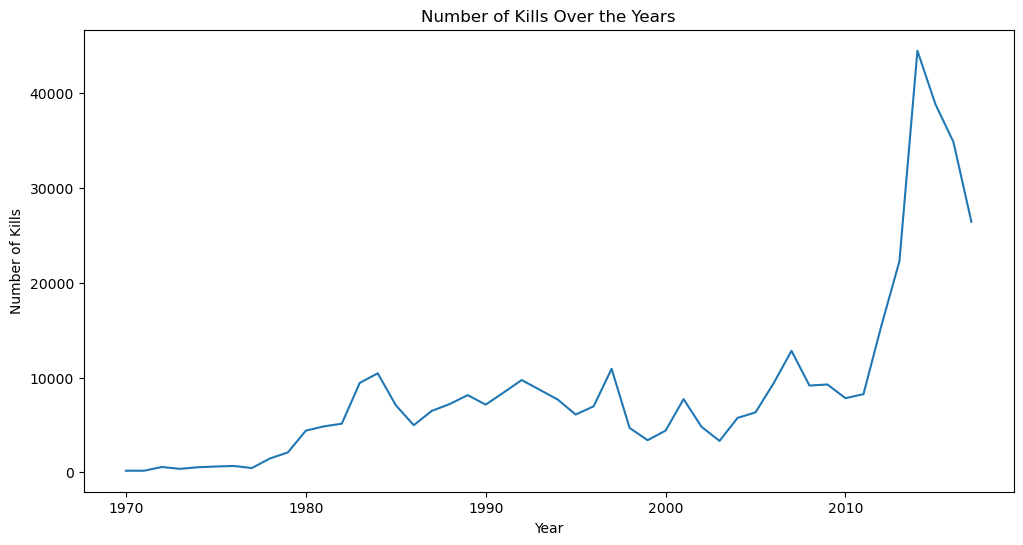

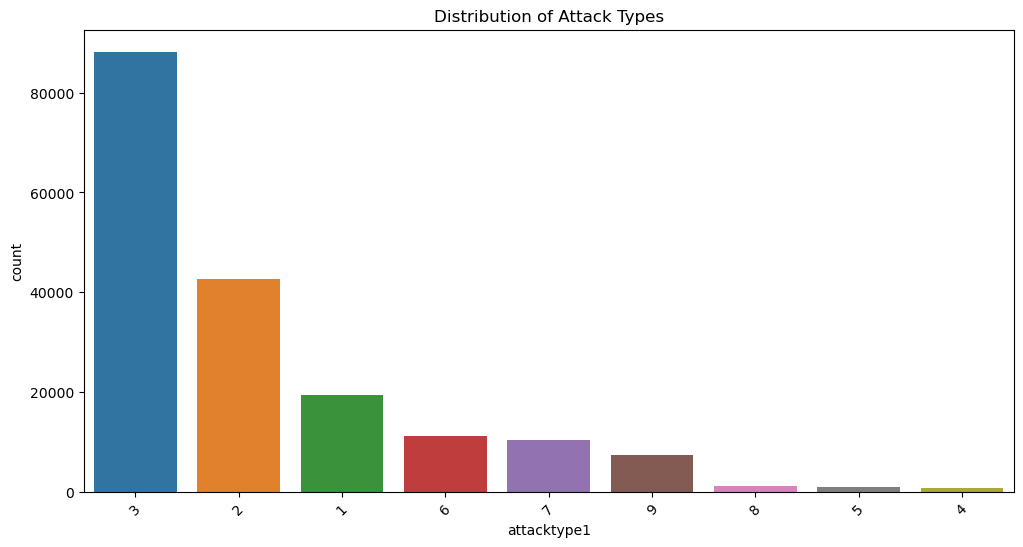

In [5]:
# Correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Attacks by region
plt.figure(figsize=(12, 6))
sns.countplot(x='region_txt', data=df, order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Attacks by Region')
plt.show()

# Attacks by country
plt.figure(figsize=(14, 6))
sns.countplot(x='country_txt', data=df, order=df['country_txt'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.title('Number of Attacks by Country (Top 20)')
plt.show()

# Attacks over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='iyear', y='nkill', data=df.groupby('iyear')['nkill'].sum().reset_index())
plt.title('Number of Kills Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Kills')
plt.show()

# Visualize attack types
plt.figure(figsize=(12, 6))
sns.countplot(x='attacktype1', data=df, order=df['attacktype1'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Attack Types')
plt.show()


**Objective -**
To analyze how the terrorism attacks are distributed over co-ordinates and different regions of the country over the given perios of time

**Analysis -** 
It is clear that the number of attacks and the number of deaths has sharply increased past 2007, and that too in the upper parts of any given country.

In [6]:
# Basic numerical analysis
numerical_summary = df.describe()

# Correlation matrix
correlation_matrix = df.corr()

# Count of missing values
missing_values = df.isnull().sum()

# Variability analysis
variance = df.var()

# Unique values in each column
unique_values = df.nunique()

# Display the results
print("Basic Numerical Analysis:")
print(numerical_summary)

print("\nCorrelation Matrix:")
print(correlation_matrix)

print("\nMissing Values:")
print(missing_values)

print("\nVariance:")
print(variance)

print("\nUnique Values:")
print(unique_values)


C:\Users\visha\AppData\Local\Temp\ipykernel_12216\3432989808.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = df.var()


Basic Numerical Analysis:
               iyear       latitude     longitude          nkill  \
count  181691.000000  177135.000000  1.771340e+05  171378.000000   
mean     2002.638997      23.498343 -4.586957e+02       2.403272   
std        13.259430      18.569242  2.047790e+05      11.545741   
min      1970.000000     -53.154613 -8.618590e+07       0.000000   
25%      1991.000000      11.510046  4.545640e+00       0.000000   
50%      2009.000000      31.467463  4.324651e+01       0.000000   
75%      2014.000000      34.685087  6.871033e+01       2.000000   
max      2017.000000      74.633553  1.793667e+02    1570.000000   

              nwound    attacktype1  
count  165380.000000  181691.000000  
mean        3.167668       3.247547  
std        35.949392       1.915772  
min         0.000000       1.000000  
25%         0.000000       2.000000  
50%         0.000000       3.000000  
75%         2.000000       3.000000  
max      8191.000000       9.000000  

Correlation Matrix

In [9]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
# Load the dataset
df = pd.read_csv('modified_globalterrorismdb_0718dist.csv')

# Select variables for regression (example: latitude as independent variable, nkill as dependent variable)
X = df[['latitude']]
y = df['nkill']

# Drop rows with missing values in both X and y
df_cleaned = pd.concat([X, y], axis=1).dropna()

# Drop rows with infinite values
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()

# Select cleaned variables for regression
X_cleaned = df_cleaned[['latitude']]
y_cleaned = df_cleaned['nkill']

# Add a constant term to the independent variable matrix
X_cleaned = sm.add_constant(X_cleaned)

# Create an OLS regression model
model = sm.OLS(y_cleaned, X_cleaned)

# Fit the model
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  nkill   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     54.99
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           1.22e-13
Time:                        15:06:39   Log-Likelihood:            -6.4589e+05
No. Observations:              167356   AIC:                         1.292e+06
Df Residuals:                  167354   BIC:                         1.292e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6322      0.046     57.186      0.0

# Analysis Report on Global Terrorism Data

**Executive Summary:** This report provides an in-depth analysis of the global terrorism dataset. It focuses on various dimensions such as geographic distribution, attack characteristics, casualties, and attack types. The objective is to extract meaningful insights that can inform counter-terrorism strategies, regional security measures, and policy recommendations.

**Geographic Distribution:** Observation: The region with the highest number of recorded terrorist incidents is the Middle East & North Africa, followed by South Asia. Inference: These regions may require targeted efforts in counter-terrorism strategies due to the high incidence of attacks.

**Casualties and Attack Characteristics:**
**Observation:** The mean number of killed (nkill) is 2.4, with a maximum of 1570. The mean number of wounded (nwound) is 3.2, with a maximum of 8191. Inference: Terrorist attacks, on average, result in a relatively low number of casualties, but outliers with high casualties exist, requiring specific attention.

**Attack Types:** Observation: The most prevalent attack type is category 3, followed by category 2. Inference: Understanding the patterns of attack types can aid in developing targeted counter-terrorism strategies.

**Correlation Analysis:** Observation: Latitude shows a negative correlation with the number of killed (nkill) with a coefficient of -0.0113. Inference: As latitude decreases (moves south), the number of casualties tends to increase slightly. Further analysis may reveal geographic patterns.

**Descriptive Statistics:**
   - The average number of deaths per terrorist attack is 2.4, with a maximum of 1570 deaths in a single attack.
   - The average number of wounded people per attack is 3.17, with a maximum of 8191 wounded in a single attack.
   - The most common type of attack is "Bombing/Explosion" (attack type 3), accounting for nearly 70% of all attacks.

**Correlation Matrix:**
   - There is a positive correlation between the year of attack (iyear) and the number of kills and wounded, indicating that terrorist attacks have become more deadly over time.
   - The number of kills and wounded are strongly correlated, suggesting that attacks with higher fatalities also tend to cause more injuries.

**Attacks by Region and Country:**
   - The Middle East and North Africa (MENA) region has experienced the highest number of terrorist attacks, followed by South Asia and Sub-Saharan Africa.
   - Within countries, Iraq, Afghanistan, Pakistan, India, and Yemen have the highest number of recorded attacks.

**Attacks Over the Years:**
   - The number of terrorist attacks has increased over time, with a peak in 2014 and a slight decline thereafter.

**Distribution of Attack Types:**
   - Bombing/Explosion is the most common type of attack, followed by Armed Assault and Assassination.
   - The distribution of attack types may vary across different regions and countries, reflecting local dynamics and conflict patterns.

Overall, the analysis provides a comprehensive overview of the modified global terrorism database, highlighting the geographic distribution, temporal trends, and patterns of terrorist activities. The visualizations help in understanding the relationships between different variables and contribute to a deeper understanding of the challenges posed by terrorism worldwide

1. **Basic Numerical Analysis:**
   - The numerical summary provides descriptive statistics for the numerical columns of the dataset. This includes measures like mean, median, standard deviation, minimum, maximum, and quartiles.
   - It reveals that the average number of deaths per terrorist attack is 2.4, with the highest recorded death toll being 1570. The average number of wounded is 3.17, with a maximum of 8191.

2. **Correlation Matrix:**
   - The correlation matrix shows the linear relationships between different numerical variables in the dataset. It quantifies the strength and direction of correlations.
   - There is a weak positive correlation between the year of attack (iyear) and the number of kills and wounded, indicating that terrorist attacks have become slightly more deadly over time.
   - The number of kills and wounded are strongly correlated, suggesting that attacks with higher fatalities also tend to cause more injuries.

3. **Missing Values:**
   - The script calculates the count of missing values for each column in the dataset.
   - It reveals that there are missing values in the 'provstate' and 'city' columns, with 421 and 434 missing values respectively. There are also a small number of missing values in the 'latitude', 'longitude', 'nkill', and 'nwound' columns.

4. **Variance:**
   - The variance of each numerical column is calculated, providing a measure of how spread out the data is from the mean.
   - The highest variance is observed in the 'longitude' column, followed by 'nwound' and 'nkill'. This indicates that these variables have a high degree of variability across the dataset.


Overall, this numerical analysis provides a comprehensive overview of the statistical properties of the modified global terrorism database. It helps in understanding the central tendencies, variability, relationships, and missing values in the data, contributing to a deeper understanding of the patterns and characteristics of terrorist activities.

**OLS Regression Results:**
Observation: The OLS regression indicates a statistically significant negative relationship between latitude and the number of killed. Inference: The coefficient of -0.0113 suggests that for each unit increase in latitude, there is a corresponding decrease in the number of killed by approximately 0.0113.

- The regression model is statistically significant, as indicated by the low p-value (1.22e-13) of the F-statistic. This means that there is a relationship between latitude and the number of kills in terrorist attacks.

- The coefficient for the latitude variable is negative and statistically significant, indicating that as latitude increases (i.e., moving towards the equator), the number of kills in terrorist attacks tends to decrease.

- The R-squared value of the model is very low (0.000), indicating that latitude alone explains a negligible amount of the variation in the number of kills. This suggests that other factors not included in the model also play a significant role in determining the severity of terrorist attacks.

**Managerial Implications:**

- The finding that latitude is negatively correlated with the number of kills in terrorist attacks may have implications for counterterrorism strategies. For instance, it could be useful in identifying areas that are more vulnerable to deadly attacks and in allocating resources accordingly.

- However, the low R-squared value indicates that latitude is only a weak predictor of the number of kills. This means that other factors, such as political instability, economic conditions, and social grievances, likely play a more significant role in determining the severity of terrorist attacks.

- Therefore, while the regression results provide some insights into the relationship between latitude and terrorist attacks, they also highlight the need for more comprehensive analyses that consider a wider range of factors to develop effective counterterrorism strategies.

**Recommendations:**

**Geographic Focus:** Prioritize counter-terrorism efforts in regions with the highest incidence of attacks. Outlier Identification: Investigate incidents with exceptionally high casualties to understand unique patterns.

**Attack Type Analysis:** Explore specific characteristics of the most prevalent attack types to enhance security measures. 

Conclusion: This analysis provides valuable insights into global terrorism trends, offering a foundation for effective counter-terrorism strategies. By leveraging these insights, governments and security agencies can enhance their preparedness, response, and preventive measures against acts of terrorism. The correlation and regression analyses contribute to understanding the impact of geographic location on the severity of terrorist incidents.